# Valid Sudoku 
Determine if a 9 x 9 Sudoku board is valid. Only the filled cells need to be validated according to the following rules:

Each row must contain the digits 1-9 without repetition.
Each column must contain the digits 1-9 without repetition.
Each of the nine 3 x 3 sub-boxes of the grid must contain the digits 1-9 without repetition.
Note:

A Sudoku board (partially filled) could be valid but is not necessarily solvable.
Only the filled cells need to be validated according to the mentioned rules.

Input: board = 

    [["5","3",".",".","7",".",".",".","."]
    ,["6",".",".","1","9","5",".",".","."]
    ,[".","9","8",".",".",".",".","6","."]
    ,["8",".",".",".","6",".",".",".","3"]
    ,["4",".",".","8",".","3",".",".","1"]
    ,["7",".",".",".","2",".",".",".","6"]
    ,[".","6",".",".",".",".","2","8","."]
    ,[".",".",".","4","1","9",".",".","5"]
    ,[".",".",".",".","8",".",".","7","9"]]
Output: true

Example 2:

Input: board = 

    [["8","3",".",".","7",".",".",".","."]
    ,["6",".",".","1","9","5",".",".","."]
    ,[".","9","8",".",".",".",".","6","."]
    ,["8",".",".",".","6",".",".",".","3"]
    ,["4",".",".","8",".","3",".",".","1"]
    ,["7",".",".",".","2",".",".",".","6"]
    ,[".","6",".",".",".",".","2","8","."]
    ,[".",".",".","4","1","9",".",".","5"]
    ,[".",".",".",".","8",".",".","7","9"]]
Output: false
Explanation: Same as Example 1, except with the 5 in the top left corner being modified to 8. Since there are two 8's in the top left 3x3 sub-box, it is invalid.

Constraints:

    board.length == 9
    board[i].length == 9
    board[i][j] is a digit 1-9 or '.'.

In [56]:
board =[["8","3",".",".","7",".",".",".","."]
    ,["6",".",".","1","9","5",".",".","."]
    ,[".","9","8",".",".",".",".","6","."]
    ,["8",".",".",".","6",".",".",".","3"]
    ,["4",".",".","8",".","3",".",".","1"]
    ,["7",".",".",".","2",".",".",".","6"]
    ,[".","6",".",".",".",".","2","8","."]
    ,[".",".",".","4","1","9",".",".","5"]
    ,[".",".",".",".","8",".",".","7","9"]]

In [60]:
import collections
def valid_sudoku(input_board): 
    cols = collections.defaultdict(set)
    rows = collections.defaultdict(set)
    squares = collections.defaultdict(set)

    for r in range(9):
        for c in range(9):
            if input_board[r][c] == '.':
                continue
            if (input_board[r][c] in rows[r] or 
                input_board[r][c] in cols[c] or 
                input_board[r][c] in squares[(r//3,c//3)]):
                return False
            cols[c].add(board[r][c])
            rows[r].add(board[r][c])
            squares[(r//3,c//3)].add(input_board[r][c])
    return True

valid_sudoku(board)

False

## Explanation

Each row does not have repititions 

    - Unique hash set for each row 

Each column does not have repititions 

    - Unique hash set for each column 
    
Time complexity for these two steps will be size of grid: 9 squared

Each of 3 * 3 sub-boxes of the grid must have no repitions 

    - Hash Set for the grid
    [-----]: 0 row set (of 3 rows)   
    [-----]: 1 row set (of 3 rows)
    [-----]: 2 row set (of 3 rows)

    [1,1]= subsquare in the middle 
    . . .
    . x .
    . . .

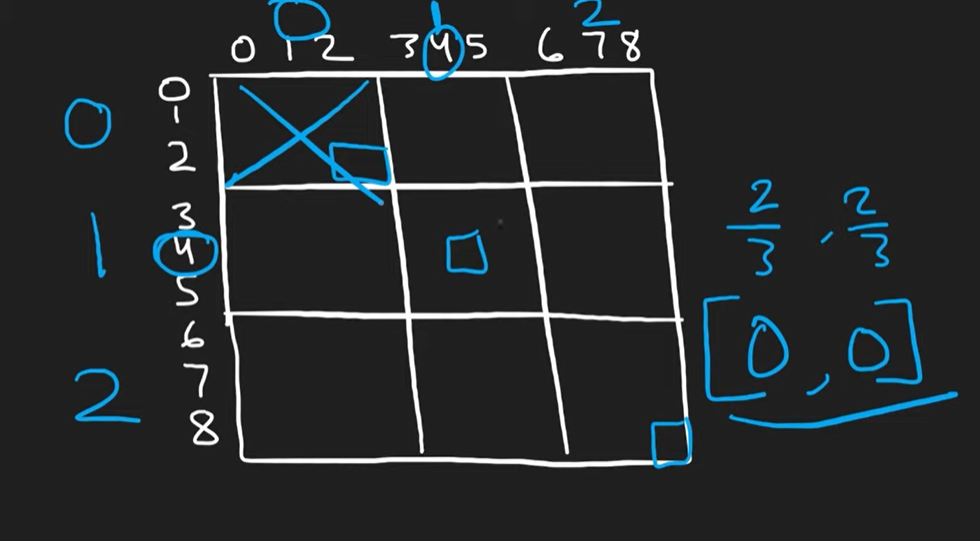

In [62]:
def valid_sudoku(board):
    for i in range(9):
        row = [board[i][j] for j in range(9) if board[i][j] != '.']
        col = [board[j][i] for j in range(9) if board[j][i] != '.']
        square = [board[(i//3)*3 + j//3][(i%3)*3 + j%3] for j in range(9) if board[(i//3)*3 + j//3][(i%3)*3 + j%3] != '.']
        
        if len(row) != len(set(row)) or len(col) != len(set(col)) or len(square) != len(set(square)):
            return False
    return True

valid_sudoku(board)

False

In [66]:
for i in range(9):
    row = [board[i][j] for j in range(9) if board[i][j] != '.']
    # print(row)
    col = [board[j][i] for j in range(9) if board[j][i] != '.']
    # print(col)
    square = [board[(i//3)*3 + j//3][(i%3)*3 + j%3] for j in range(9) if board[(i//3)*3 + j//3][(i%3)*3 + j%3] != '.']

    # if len(row) != len(set(row)) or len(col) != len(set(col)) or len(square) != len(set(square)):
    # # return False
    # # return True